In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
file_path = r'C:\Users\Admin\OneDrive\Desktop\train.csv'
df_train = pd.read_csv(file_path)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
file_path = r'C:\Users\Admin\OneDrive\Desktop\test.csv'
df_test = pd.read_csv(file_path)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [5]:
print(df_train.count())
print(df_test.count())

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64
Item_Identifier              5681
Item_Weight                  4705
Item_Fat_Content             5681
Item_Visibility              5681
Item_Type                    5681
Item_MRP                     5681
Outlet_Identifier            5681
Outlet_Establishment_Year    5681
Outlet_Size                  4075
Outlet_Location_Type         5681
Outlet_Type                  5681
dtype: int64


## EDA

In [6]:
missing_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing_data = pd.DataFrame({
    'Missing Values': df_train.isnull().sum(),
    'Percent': missing_percent
})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

             Missing Values    Percent
Item_Weight            1463  17.165317
Outlet_Size            2410  28.276428


In [7]:
missing_percent = (df_test.isnull().sum() / len(df_train)) * 100
missing_data1 = pd.DataFrame({
    'Missing Values': df_test.isnull().sum(),
    'Percent': missing_percent
})
missing_data1 = missing_data1[missing_data1['Missing Values'] > 0]
print(missing_data1)

             Missing Values    Percent
Item_Weight             976  11.451367
Outlet_Size            1606  18.843130


In [8]:

print(df_train['Outlet_Size'].value_counts(dropna=False))
print(df_test['Outlet_Size'].value_counts(dropna=False))

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64
Outlet_Size
Medium    1862
NaN       1606
Small     1592
High       621
Name: count, dtype: int64


In [9]:
pd.crosstab(df_train['Outlet_Type'], df_train['Outlet_Size'], margins=True)

Outlet_Size,High,Medium,Small,All
Outlet_Type,,,,
Grocery Store,0,0,528,528
Supermarket Type1,932,930,1860,3722
Supermarket Type2,0,928,0,928
Supermarket Type3,0,935,0,935
All,932,2793,2388,6113


In [10]:
pd.crosstab(df_test['Outlet_Type'], df_train['Outlet_Size'], margins=True)

Outlet_Size,High,Medium,Small,All
Outlet_Type,,,,
Grocery Store,79,231,219,529
Supermarket Type1,417,1204,1012,2633
Supermarket Type2,70,194,177,441
Supermarket Type3,64,203,179,446
All,630,1832,1587,4049


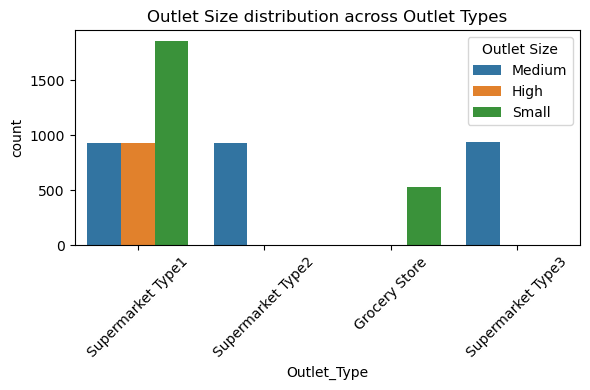

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='Outlet_Type', hue='Outlet_Size')
plt.title('Outlet Size distribution across Outlet Types')
plt.xticks(rotation=45)
plt.legend(title='Outlet Size')
plt.tight_layout()
plt.show()

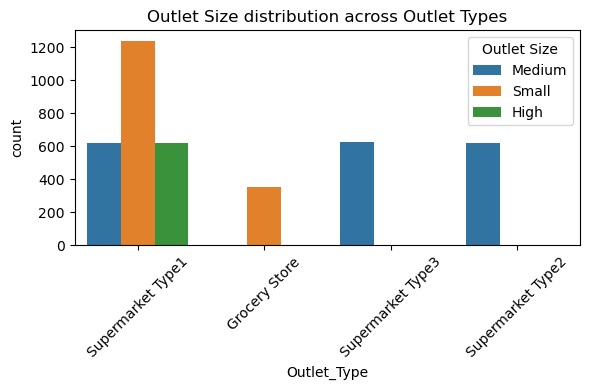

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_test, x='Outlet_Type', hue='Outlet_Size')
plt.title('Outlet Size distribution across Outlet Types')
plt.xticks(rotation=45)
plt.legend(title='Outlet Size')
plt.tight_layout()
plt.show()

In [13]:
df_train[df_train['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [14]:
df_test[df_test['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1236
Grocery Store         370
Name: count, dtype: int64

In [15]:
df_train.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_test.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [17]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(
   df_train.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0])
)
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(
   df_test.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0])
)

In [18]:
print(df_train['Outlet_Size'].isnull().sum())
print(df_test['Outlet_Size'].isnull().sum())

0
0


In [19]:

missing_weight_df = df_train[df_train['Item_Weight'].isnull()]

known_items = df_train[df_train['Item_Weight'].notnull()]['Item_Identifier'].unique()
missing_items = missing_weight_df['Item_Identifier'].unique()

matching_items =[item for item in missing_items if item in known_items]
unique_missing_items = [item for item in missing_items if item not in known_items]

print(f"Total missing Item_Weight values: {len(missing_weight_df)}")
print(f"Missing Item_Identifiers with known weights: {len(matching_items)}")
print(f"Missing Item_Identifiers with no known weights: {len(unique_missing_items)}")

Total missing Item_Weight values: 1463
Missing Item_Identifiers with known weights: 1138
Missing Item_Identifiers with no known weights: 4


In [20]:
missing_weight_df1 = df_test[df_test['Item_Weight'].isnull()]

known_items1 = df_test[df_test['Item_Weight'].notnull()]['Item_Identifier'].unique()
missing_items1 = missing_weight_df1['Item_Identifier'].unique()

matching_items1 =[item for item in missing_items if item in known_items1]
unique_missing_items1 = [item for item in missing_items if item not in known_items1]

print(f"Total missing Item_Weight values: {len(missing_weight_df1)}")
print(f"Missing Item_Identifiers with known weights: {len(matching_items1)}")
print(f"Missing Item_Identifiers with no known weights: {len(unique_missing_items1)}")

Total missing Item_Weight values: 976
Missing Item_Identifiers with known weights: 1120
Missing Item_Identifiers with no known weights: 22


In [21]:
weight_map = df_train.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df_train['Item_Weight'].fillna(weight_map, inplace=True)

weight_map1 = df_test.groupby('Item_Identifier')['Item_Weight'].transform('mean')
df_test['Item_Weight'].fillna(weight_map, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6836\1435853544.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(weight_map, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6836\1435853544.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [22]:
print(df_train['Item_Weight'].isnull().sum())

4


In [23]:
print(df_test['Item_Weight'].isnull().sum())

1


In [24]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6836\1265611824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)


In [25]:
print(df_train['Item_Weight'].isnull().sum())

0


In [26]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6836\3728774565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)


In [27]:
print(df_test['Item_Weight'].isnull().sum())

0


In [28]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

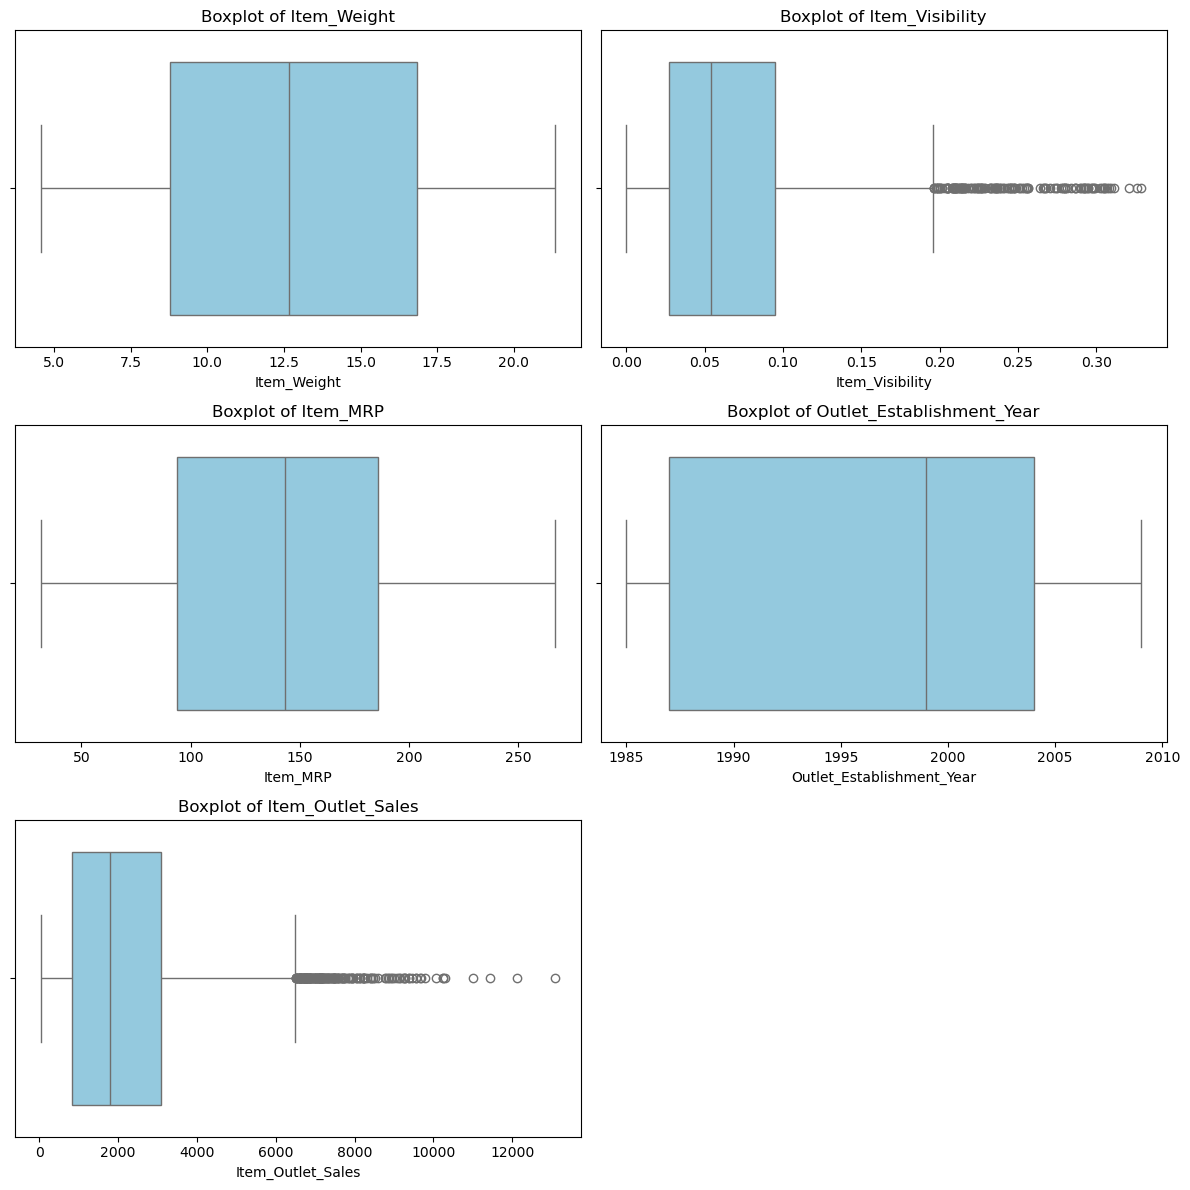

In [29]:
n_cols = 2
n_rows = int((len(numeric_cols) + 1) / n_cols)

plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [30]:
Q1 = df_train['Item_Visibility'].quantile(0.25)
Q3 = df_train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_train['Item_Visibility_Capped'] = df_train['Item_Visibility'].clip(lower=lower_bound, upper=upper_bound)
df_train['Item_Visibility'] = df_train['Item_Visibility_Capped']
df_train.drop(columns=['Item_Visibility_Capped'], inplace=True)


In [31]:
df_train.shape

(8523, 12)

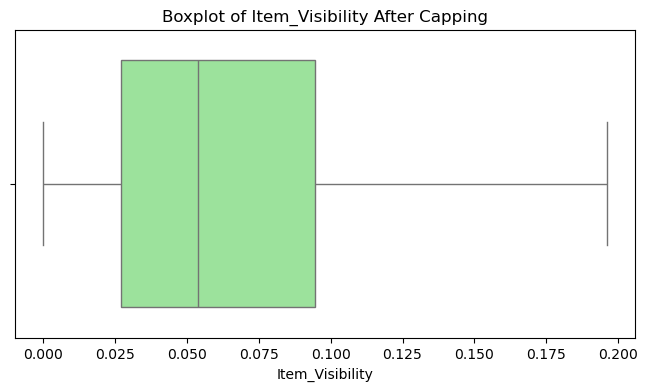

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_train['Item_Visibility'], color='lightgreen')
plt.title('Boxplot of Item_Visibility After Capping')
plt.xlabel('Item_Visibility')
plt.show()

In [33]:
numeric_cols1 = df_test.select_dtypes(include=['float64', 'int64']).columns
numeric_cols1

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

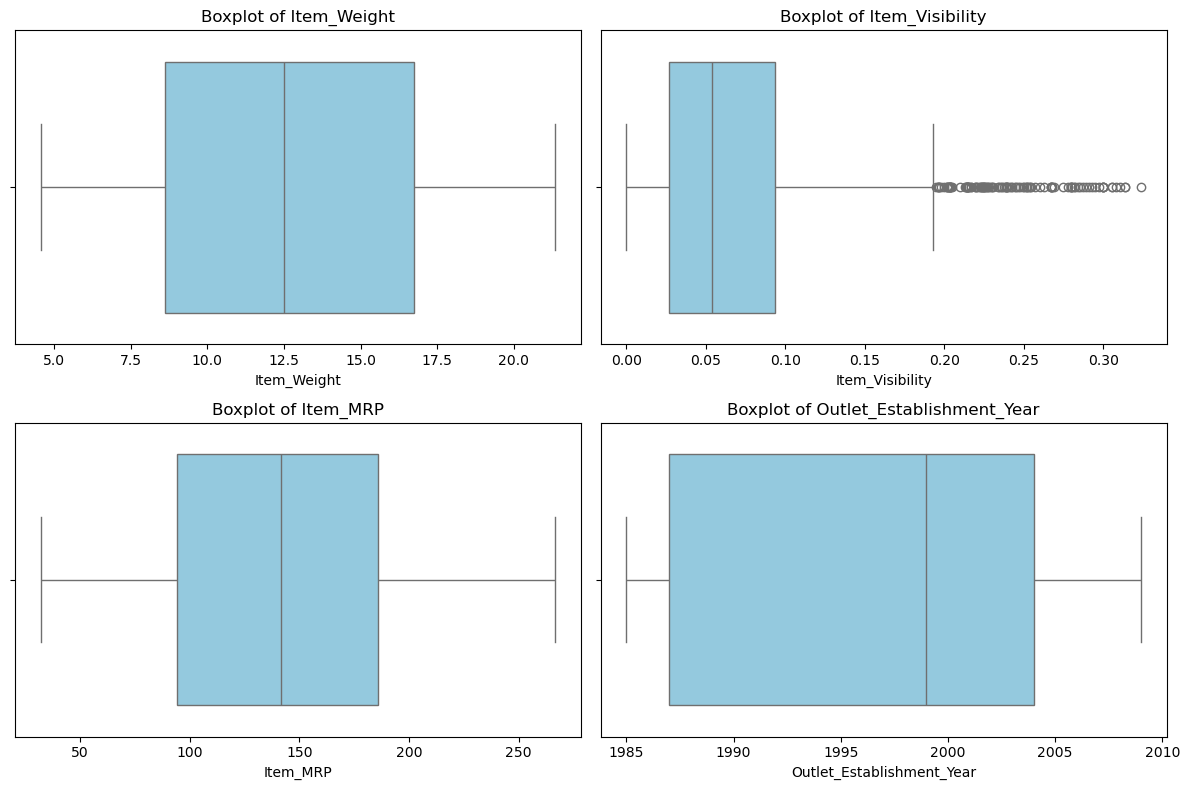

In [34]:
n_cols = 2
n_rows = int((len(numeric_cols1) + 1) / n_cols)

plt.figure(figsize=(12, n_rows * 4))

for i, col in enumerate(numeric_cols1, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_test[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [35]:
Q1_test = df_test['Item_Visibility'].quantile(0.25)
Q3_test = df_test['Item_Visibility'].quantile(0.75)
IQR_test = Q3_test - Q1_test

lower_bound_test = Q1_test - 1.5 * IQR_test
upper_bound_test = Q3_test + 1.5 * IQR_test

df_test['Item_Visibility_Capped'] = df_test['Item_Visibility'].clip(lower=lower_bound_test, upper=upper_bound_test)
df_test['Item_Visibility'] = df_test['Item_Visibility_Capped']
df_test.drop(columns=['Item_Visibility_Capped'], inplace=True)

In [36]:
df_test.shape

(5681, 11)

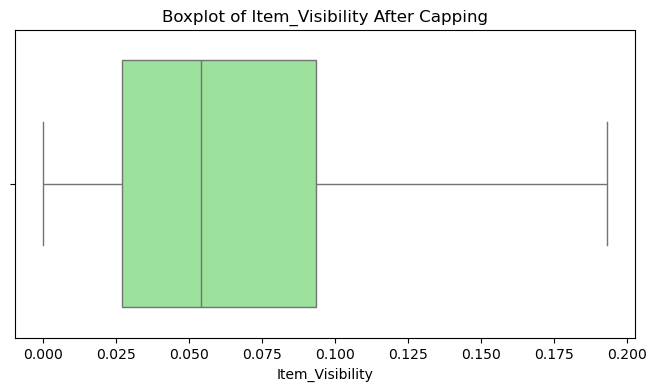

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_test['Item_Visibility'], color='lightgreen')
plt.title('Boxplot of Item_Visibility After Capping')
plt.xlabel('Item_Visibility')
plt.show()

In [38]:
print(df_train['Item_Fat_Content'].value_counts())

fat_content_map = {
    'Low Fat': 'Low Fat',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
}
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(fat_content_map)
print(df_train['Item_Fat_Content'].unique())

print(df_train['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
['Low Fat' 'Regular']
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [39]:
print(df_test['Item_Fat_Content'].value_counts())

fat_content_map1 = {
    'Low Fat': 'Low Fat',
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
}
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(fat_content_map1)
print(df_test['Item_Fat_Content'].unique())

print(df_test['Item_Fat_Content'].value_counts())


Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64
['Low Fat' 'Regular']
Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64


In [40]:
print(df_train['Item_Visibility'].describe())

median_visibility = df_train.loc[df_train['Item_Visibility'] > 0, 'Item_Visibility'].median()
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0, median_visibility)

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64


In [41]:
print(df_test['Item_Visibility'].describe())

median_visibility = df_test.loc[df_test['Item_Visibility'] > 0, 'Item_Visibility'].median()
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace(0, median_visibility)

count    5681.000000
mean        0.064681
std         0.047921
min         0.000000
25%         0.027047
50%         0.054154
75%         0.093463
max         0.193086
Name: Item_Visibility, dtype: float64


In [42]:
print(df_train['Item_Type'].value_counts())

group_map = {
    'Fruits and Vegetables': 'Perishables',
    'Snack Foods': 'Snacks',
    'Household': 'Household Items',
    'Frozen Foods': 'Frozen',
    'Dairy': 'Perishables',
    'Canned': 'Canned',
    'Baking Goods': 'Bakery',
    'Health and Hygiene': 'Health and Hygiene',
    'Soft Drinks': 'Beverages',
    'Meat': 'Perishables',
    'Breads': 'Bakery',
    'Hard Drinks': 'Beverages',
    'Others': 'Others',
    'Starchy Foods': 'Perishables',
    'Breakfast': 'Snacks',
    'Seafood': 'Perishables'
}
df_train['Item_Type'] = df_train['Item_Type'].map(group_map)
df_train['Item_Type'] = df_train['Item_Type'].fillna('Others')

print(df_train['Item_Type'].value_counts())

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Item_Type
Perishables           2551
Snacks                1310
Household Items        910
Bakery                 899
Frozen                 856
Beverages              659
Canned                 649
Health and Hygiene     520
Others                 169
Name: count, dtype: int64


In [43]:
print(df_test['Item_Type'].value_counts())

group_map1 = {
    'Fruits and Vegetables': 'Perishables',
    'Snack Foods': 'Snacks',
    'Household': 'Household Items',
    'Frozen Foods': 'Frozen',
    'Dairy': 'Perishables',
    'Canned': 'Canned',
    'Baking Goods': 'Bakery',
    'Health and Hygiene': 'Health and Hygiene',
    'Soft Drinks': 'Beverages',
    'Meat': 'Perishables',
    'Breads': 'Bakery',
    'Hard Drinks': 'Beverages',
    'Others': 'Others',
    'Starchy Foods': 'Perishables',
    'Breakfast': 'Snacks',
    'Seafood': 'Perishables'
}
df_test['Item_Type'] = df_test['Item_Type'].map(group_map1)
df_test['Item_Type'] = df_test['Item_Type'].fillna('Others')

print(df_test['Item_Type'].value_counts())

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64
Item_Type
Perishables           1692
Snacks                 865
Household Items        638
Bakery                 603
Frozen                 570
Canned                 435
Beverages              429
Health and Hygiene     338
Others                 111
Name: count, dtype: int64


In [44]:
 df_train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [45]:
df_train.groupby('Outlet_Identifier')['Item_Identifier'].nunique()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Item_Identifier, dtype: int64

In [46]:
df_train.groupby('Outlet_Type')['Outlet_Identifier'].nunique()

Outlet_Type
Grocery Store        2
Supermarket Type1    6
Supermarket Type2    1
Supermarket Type3    1
Name: Outlet_Identifier, dtype: int64

In [47]:
df_train.groupby('Outlet_Location_Type')['Outlet_Identifier'].nunique()

Outlet_Location_Type
Tier 1    3
Tier 2    3
Tier 3    4
Name: Outlet_Identifier, dtype: int64

In [48]:
df_train.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Identifier'].nunique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                  1
                   Tier 3                  1
Supermarket Type1  Tier 1                  2
                   Tier 2                  3
                   Tier 3                  1
Supermarket Type2  Tier 3                  1
Supermarket Type3  Tier 3                  1
Name: Outlet_Identifier, dtype: int64

In [49]:
print(df_train['Outlet_Establishment_Year'].value_counts().sort_index())

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64


In [50]:
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

In [51]:
for col in categorical_cols:
    sales_by_col = df_train.groupby(col)['Item_Outlet_Sales'].sum().sort_values(ascending=False)
    print(f"\nTotal Sales by {col}:")
    print(sales_by_col)


Total Sales by Item_Identifier:
Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
            ...    
FDQ04      784.3124
FDF38      771.6622
FDY43      673.7896
NCR42      332.9000
FDQ60      120.5098
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

Total Sales by Item_Fat_Content:
Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

Total Sales by Item_Type:
Item_Type
Perishables           5.760489e+06
Snacks                2.965085e+06
Household Items       2.055494e+06
Frozen                1.825735e+06
Bakery                1.818763e+06
Canned                1.444151e+06
Beverages             1.350691e+06
Health and Hygiene    1.045200e+06
Others                3.255176e+05
Name: Item_Outlet_Sales, dtype: float64

Total Sales by Outlet_Identifier:
Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
O

In [52]:
df_train['Outlet_Age'] = 2025 - df_train['Outlet_Establishment_Year']
df_train['Price_per_Unit_Weight'] = df_train['Item_MRP'] / df_train['Item_Weight']

In [53]:
categorical_cols = ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [54]:
df_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_encoded.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Price_per_Unit_Weight,Item_Fat_Content_Regular,...,Item_Type_Others,Item_Type_Perishables,Item_Type_Snacks,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,26,26.861204,False,...,False,True,False,True,False,False,False,True,False,False
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,16,8.153581,True,...,False,False,False,True,False,False,True,False,True,False
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,26,8.092457,False,...,False,True,False,True,False,False,False,True,False,False
3,FDX07,19.20,0.057792,182.0950,OUT010,1998,732.3800,27,9.484115,True,...,False,True,False,False,True,False,True,False,False,False
4,NCD19,8.93,0.057792,53.8614,OUT013,1987,994.7052,38,6.031512,False,...,False,False,False,False,False,False,True,True,False,False


In [55]:
df_test['Outlet_Age'] = 2025 - df_test['Outlet_Establishment_Year']
df_test['Price_per_Unit_Weight'] = df_test['Item_MRP'] / df_test['Item_Weight']

In [56]:
df_encoded1 = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)
df_encoded1.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Age,Price_per_Unit_Weight,Item_Fat_Content_Regular,Item_Type_Beverages,...,Item_Type_Others,Item_Type_Perishables,Item_Type_Snacks,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750,0.007565,107.8622,OUT049,1999,26,5.198178,False,False,...,False,False,True,True,False,False,False,True,False,False
1,FDW14,8.300,0.038428,87.3198,OUT017,2007,18,10.520458,True,False,...,False,True,False,False,True,True,False,True,False,False
2,NCN55,14.600,0.099575,241.7538,OUT010,1998,27,16.558479,False,False,...,True,False,False,False,True,False,True,False,False,False
3,FDQ58,7.315,0.015388,155.0340,OUT017,2007,18,21.193985,False,False,...,False,False,True,False,True,True,False,True,False,False
4,FDY38,8.930,0.118599,234.2300,OUT027,1985,40,26.229563,True,False,...,False,True,False,True,False,False,True,False,False,True


## Modeling

In [57]:
train_df = df_encoded
test_df = df_encoded1

In [58]:
print(train_df.shape)
print(test_df.shape)

(8523, 25)
(5681, 24)


In [59]:
item_sales_mean = train_df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
outlet_sales_mean = train_df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

train_df['Item_Identifier_Sales_Mean'] = train_df['Item_Identifier'].map(item_sales_mean)
train_df['Outlet_Identifier_Sales_Mean'] = train_df['Outlet_Identifier'].map(outlet_sales_mean)


In [60]:
global_item_mean = train_df['Item_Outlet_Sales'].mean()
global_outlet_mean = train_df['Item_Outlet_Sales'].mean()

test_df['Item_Identifier_Sales_Mean'] = test_df['Item_Identifier'].map(item_sales_mean).fillna(global_item_mean)
test_df['Outlet_Identifier_Sales_Mean'] = test_df['Outlet_Identifier'].map(outlet_sales_mean).fillna(global_outlet_mean)

In [61]:
train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [63]:
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [64]:
train_df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)
test_df.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [65]:
X_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']

X_test = test_df.drop('Item_Outlet_Sales', axis=1)


In [66]:
X_test.shape

(5681, 23)

In [67]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred = model.predict(X_test)

df_test_LR = df_test.copy()
df_test_LR['Item_Outlet_Sales'] = y_pred
df_test_LR.to_csv("predicted_sales.csv", index=False)

df_test_LR.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Price_per_Unit_Weight,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snacks,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,26,5.198178,1827.376156
1,FDW14,8.300,Regular,0.038428,Perishables,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,18,10.520458,1614.948896
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,27,16.558479,2689.637067
3,FDQ58,7.315,Low Fat,0.015388,Snacks,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,18,21.193985,1978.040380
4,FDY38,8.930,Regular,0.118599,Perishables,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,40,26.229563,4917.994317


In [70]:
final_output =df_test_LR[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_LR.csv', index=False)

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

df_test_tree = df_test.copy()

df_test_tree['Item_Outlet_Sales'] = y_pred_tree
df_test_tree.to_csv("predicted_sales.csv", index=False)

final_output_tree =df_test_tree[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output_tree.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_DT.csv', index=False)

In [72]:
param_grid = {
    'n_estimators': [100, 200],              
    'max_depth': [None, 10, 20, 30, 50, 60],               
    'min_samples_split': [2, 5, 10, 15],                   
    'min_samples_leaf': [1, 2, 4, 6],                     
    'max_features': ['auto', 'sqrt', 'log2'],          
    'bootstrap': [True, False]                        
}

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,               
    cv=3,                    
    verbose=2,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)
 
random_search.fit(X_train, y_train)

print(random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_hp = best_rf.predict(X_test)

df_test_hp = df_test.copy()

df_test_hp['Item_Outlet_Sales'] = y_pred_hp
df_test_hp.to_csv("predicted_sales.csv", index=False)

final_output_hp = df_test_hp[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output_hp.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_RFHP.csv', index=False)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Admin\miniconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}


In [73]:
#without hyperparameter tuning

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

df_test_rf = df_test.copy()

df_test_rf['Item_Outlet_Sales'] = y_pred_rf
df_test_rf.to_csv("predicted_sales.csv", index=False)

final_output_rf =df_test_rf[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output_rf.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_RF.csv', index=False)

In [74]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=10,
    random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

df_test_xgb = df_test.copy()

df_test_xgb['Item_Outlet_Sales'] = y_pred_xgb
df_test_xgb.to_csv("predicted_sales.csv", index=False)

final_output_xgb =df_test_xgb[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output_xgb.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_XGB.csv', index=False)

In [75]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

df_test_lgb = df_test.copy()

df_test_lgb['Item_Outlet_Sales'] = y_pred_lgb
df_test_lgb.to_csv("predicted_sales.csv", index=False)

final_output_lgb =df_test_lgb[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
final_output_lgb.to_csv( r'C:\Users\Admin\OneDrive\Desktop\output_pred_LGB.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 23
[LightGBM] [Info] Start training from score 2181.288915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes